# Header

In [37]:
import os
import seaborn as sns
from utils import *
from prody import *

os.chdir('/home/fangyuan/projects/hic/codes')
sns.set(context='notebook', style='white', palette='deep', font='sans-serif', font_scale=2, color_codes=True)

In [2]:
# prody.__file__

In [3]:
# calcGNMDomains?

# GNMs

In [2]:
colors = sns.color_palette('deep')
conditions = ['No Treat','1hr','4hrs','16hrs','24hrs', 'TamR']

In [3]:
# calc overlap from GNM
# calc gnm
chroms = ['16']
resol = '50kb'
binsize = resol2bin(resol)

cov_list = []
sqfs_list = []
corr_list = []

for i,sp in enumerate(['02','03','04','05','06','51']):
    for chrom in chroms:

        ## load GNM results 
        gnm = loadModel(f'../data/GNM/mcf7_{sp}.chr{chrom}.{resol}.sqrtvc.gnm.npz')
        
        cov = calcCovariance(gnm[:500])
        corr = calcCrossCorr(gnm[:500])
        sqf = calcSqFlucts(gnm[:500])
        
        corr_list = [corr] if i==0 else corr_list + [corr]
        sqfs = sqf if i==0 else np.vstack((sqfs,sqf))
#         corrs = corr if i==0 else np.vstack((corrs, corr))
        

([<matplotlib.lines.Line2D at 0x7f8791a7f610>,
 [])

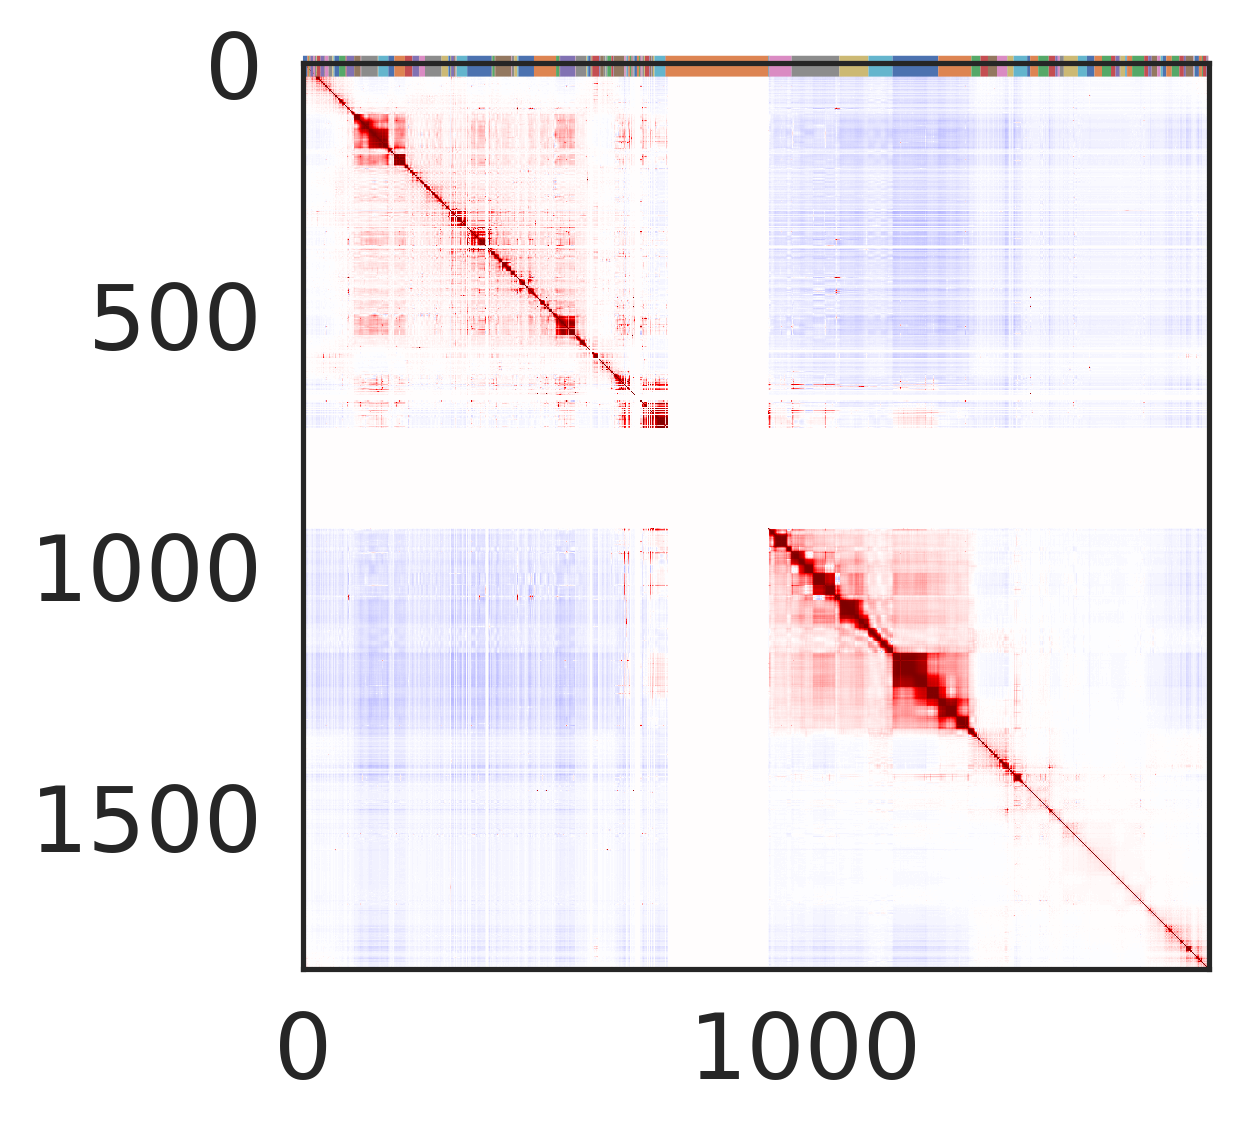

In [65]:
fig, ax = plt.subplots(dpi=300)
im = ax.imshow(corr_list[0], cmap='seismic', vmin=-1, vmax=1)

domains = calcGNMDomains(gnm[:100], dummy_mode=False, linear=True)
showDomainBar(domains, loc=5, absolute=True, text=False)

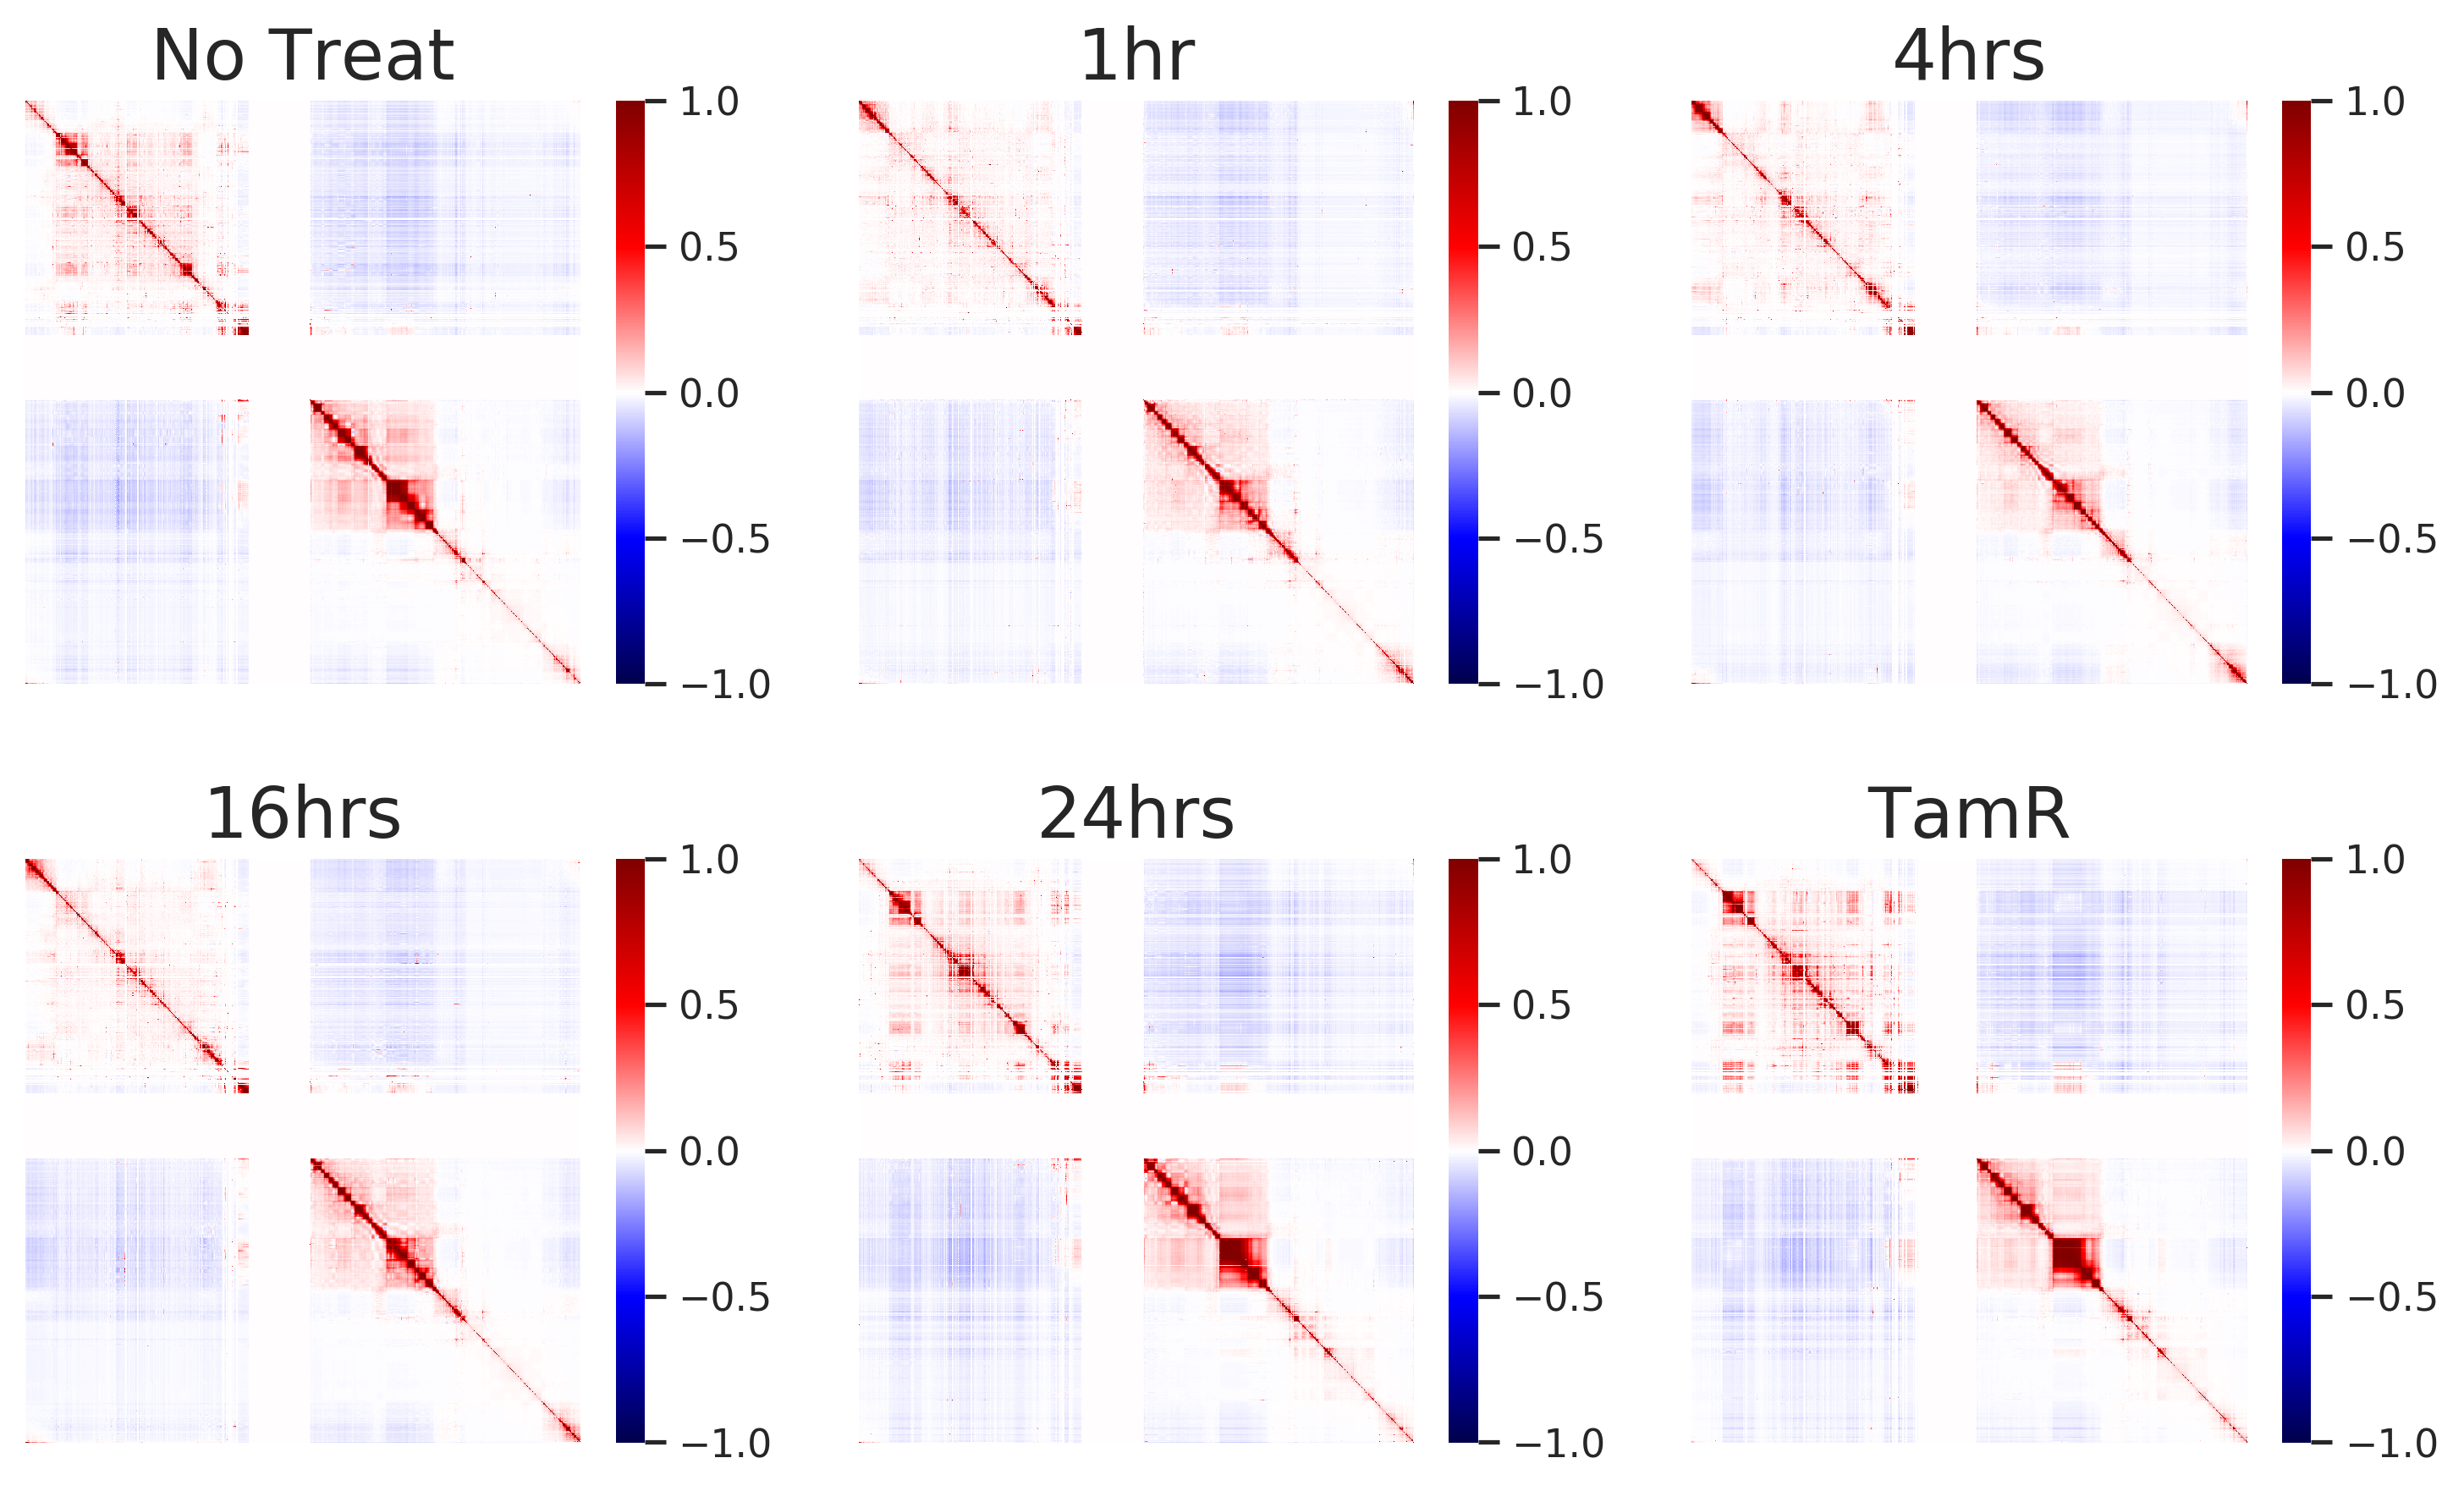

In [4]:
import seaborn as sns
sns.set(font_scale=1)

nplots = len(conditions)
ncols = 3
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*4, nrows*3.5), dpi=300)
plt.subplots_adjust(wspace=0.2, hspace=0.3) # 
axes_list = axes.flatten()

for i, cond in enumerate(conditions):
    ax = axes_list[i]
    sns.heatmap(corr_list[i], cmap='seismic', vmin=-1, vmax=1, ax=ax)
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_title(cond, fontsize=20)

In [5]:
M = np.zeros((len(conditions),len(conditions))) # gnm_overlap
'''
Returns overlap between covariances of modes1 and modes2. 
Overlap between covariances are calculated using normal modes (eigenvectors), 
hence modes in both models must have been calculated. 

This function implements equation 11 in [BH02].
[BH02]	(1, 2) Hess B. Convergence of sampling in protein simulations. Phys Rev E 2002 65(3):031910.
Parameters:	weighted (bool) – if True then covariances are weighted by the trace.
'''
for i,x in enumerate(['02','03','04','05','06','51']):
    for j,y in enumerate(['02','03','04','05','06','51']):
        
        gnm1 = loadModel(f'../data/GNM/mcf7_{x}.chr{chrom}.{resol}.sqrtvc.gnm.npz')        
        gnm2 = loadModel(f'../data/GNM/mcf7_{y}.chr{chrom}.{resol}.sqrtvc.gnm.npz')        
#         M[i,j] = calcSpectralOverlap(gnm1[:500], gnm2[:500], weighted=True, turbo=False)
        M[i,j] = calcSpectralOverlap(gnm1, gnm2, weighted=True, turbo=False)
        

Text(0.5, 0.98, 'chrom16 covariance overlap')

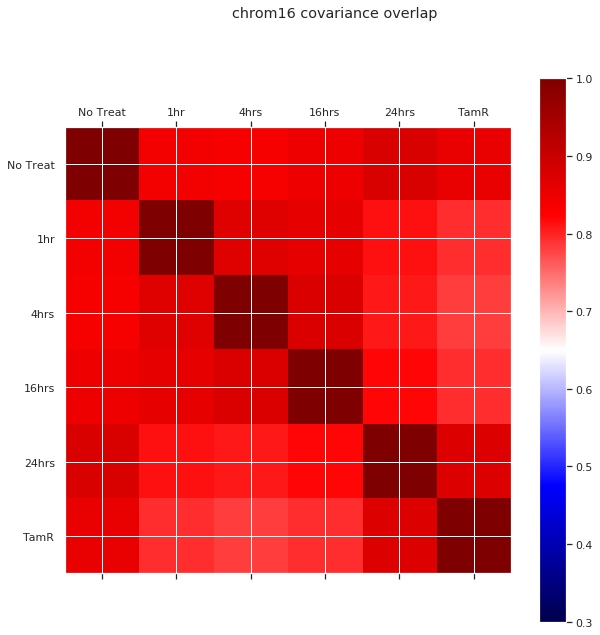

In [6]:
fig,ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(M, cmap='seismic', vmax=1,vmin=0.3)
fig.colorbar(im)

ax.set_xticks([i for i in range(6)])
ax.set_xticklabels(conditions)
ax.set_yticks([i for i in range(6)])
ax.set_yticklabels(conditions)

fig.suptitle(f'chrom{chrom} covariance overlap')

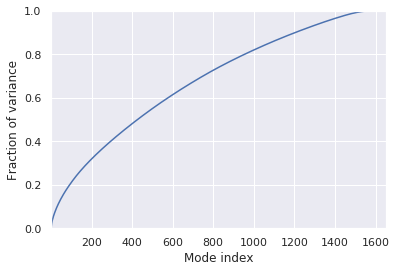

In [7]:
showCumulFractVars(gnm)

Text(0.5, 0.98, 'chrom16 Sqfs correlation')

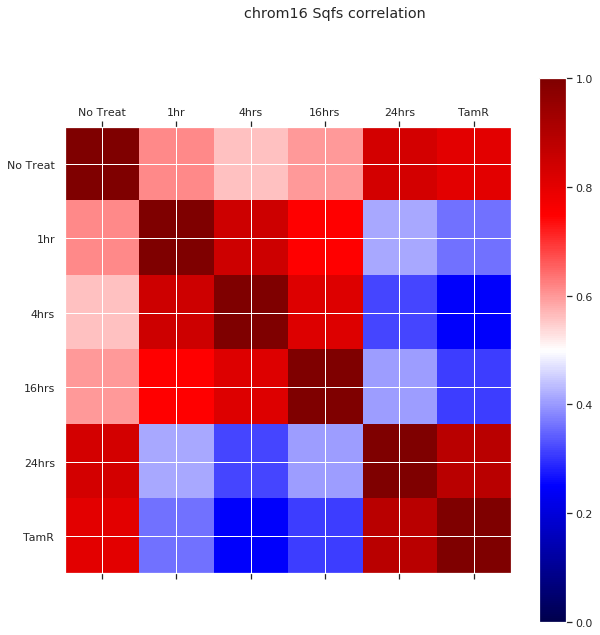

In [8]:
from scipy.spatial.distance import pdist, squareform # see https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html
M1 = squareform(pdist(sqfs, 'correlation'))

fig,ax = plt.subplots(figsize=(10, 10))
im = ax.matshow(1-M1, cmap='seismic', vmax=1,vmin=0)
fig.colorbar(im)

ax.set_xticks([i for i in range(6)])
ax.set_xticklabels(conditions)
ax.set_yticks([i for i in range(6)])
ax.set_yticklabels(conditions)

fig.suptitle(f'chrom{chrom} Sqfs correlation')

# M = squareform(pdist(sqfs, 'euclidean'))

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111)
# im = ax.matshow(1-M, cmap='coolwarm')
# fig.colorbar(im)
# plt.title('Sqfs correlation')

# M2 = squareform(pdist(sqfs, 'cosine'))

# fig,ax = plt.subplots(figsize=(10, 10))
# im = ax.matshow(1-M2, cmap='coolwarm')
# fig.colorbar(im)
# plt.title('Sqfs correlation')

Text(0.5, 1.0, 'chrom16')

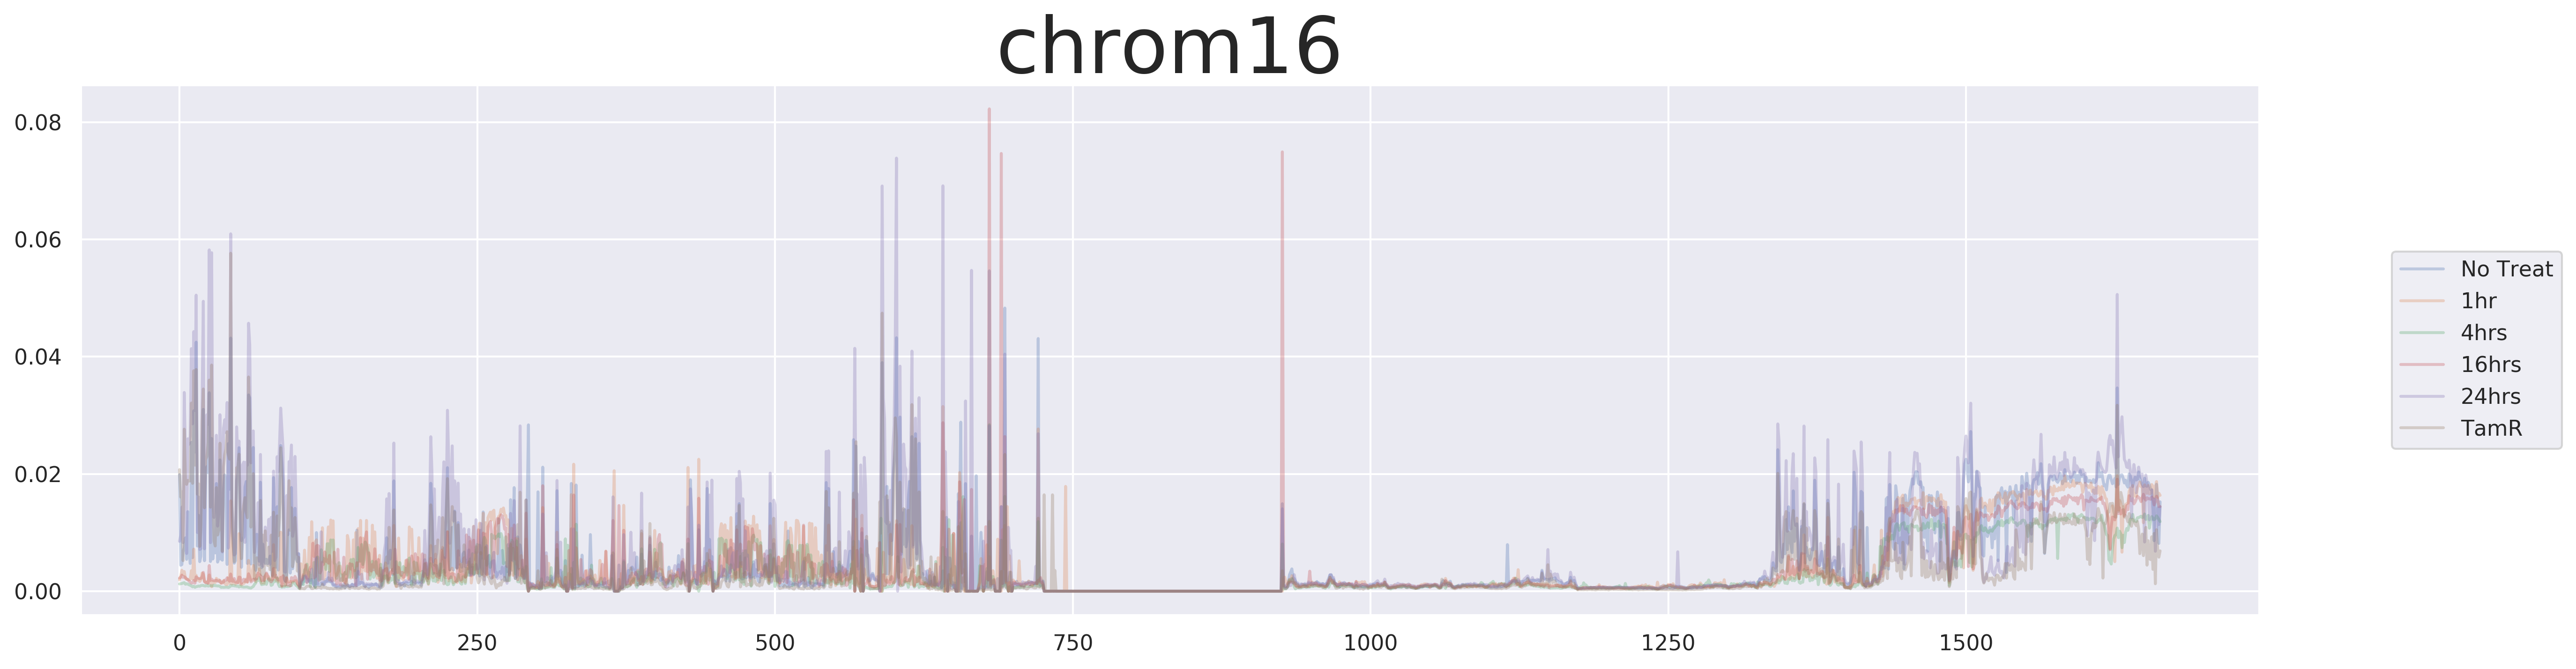

In [9]:
fig, ax = plt.subplots(figsize=(20, 5), dpi=300)
chrom = '16'

sqfs_list = []

for sp in ['02','03','04','05','06','51']:

    gnm = loadModel(f'../data/GNM/mcf7_{sp}.chr{chrom}.{resol}.sqrtvc.gnm.npz')
    gnm.masked = False 
    gnm.fixTail(1664)
        
    sqfs = calcSqFlucts(gnm[:500])
    sqfs_list.append(sqfs)

for i,x in enumerate(sqfs_list):
    ax.plot(x, '-', color=colors[i], alpha=.3, label=conditions[i])
ax.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
ax.set_title(f'chrom{chrom}', fontsize=40)

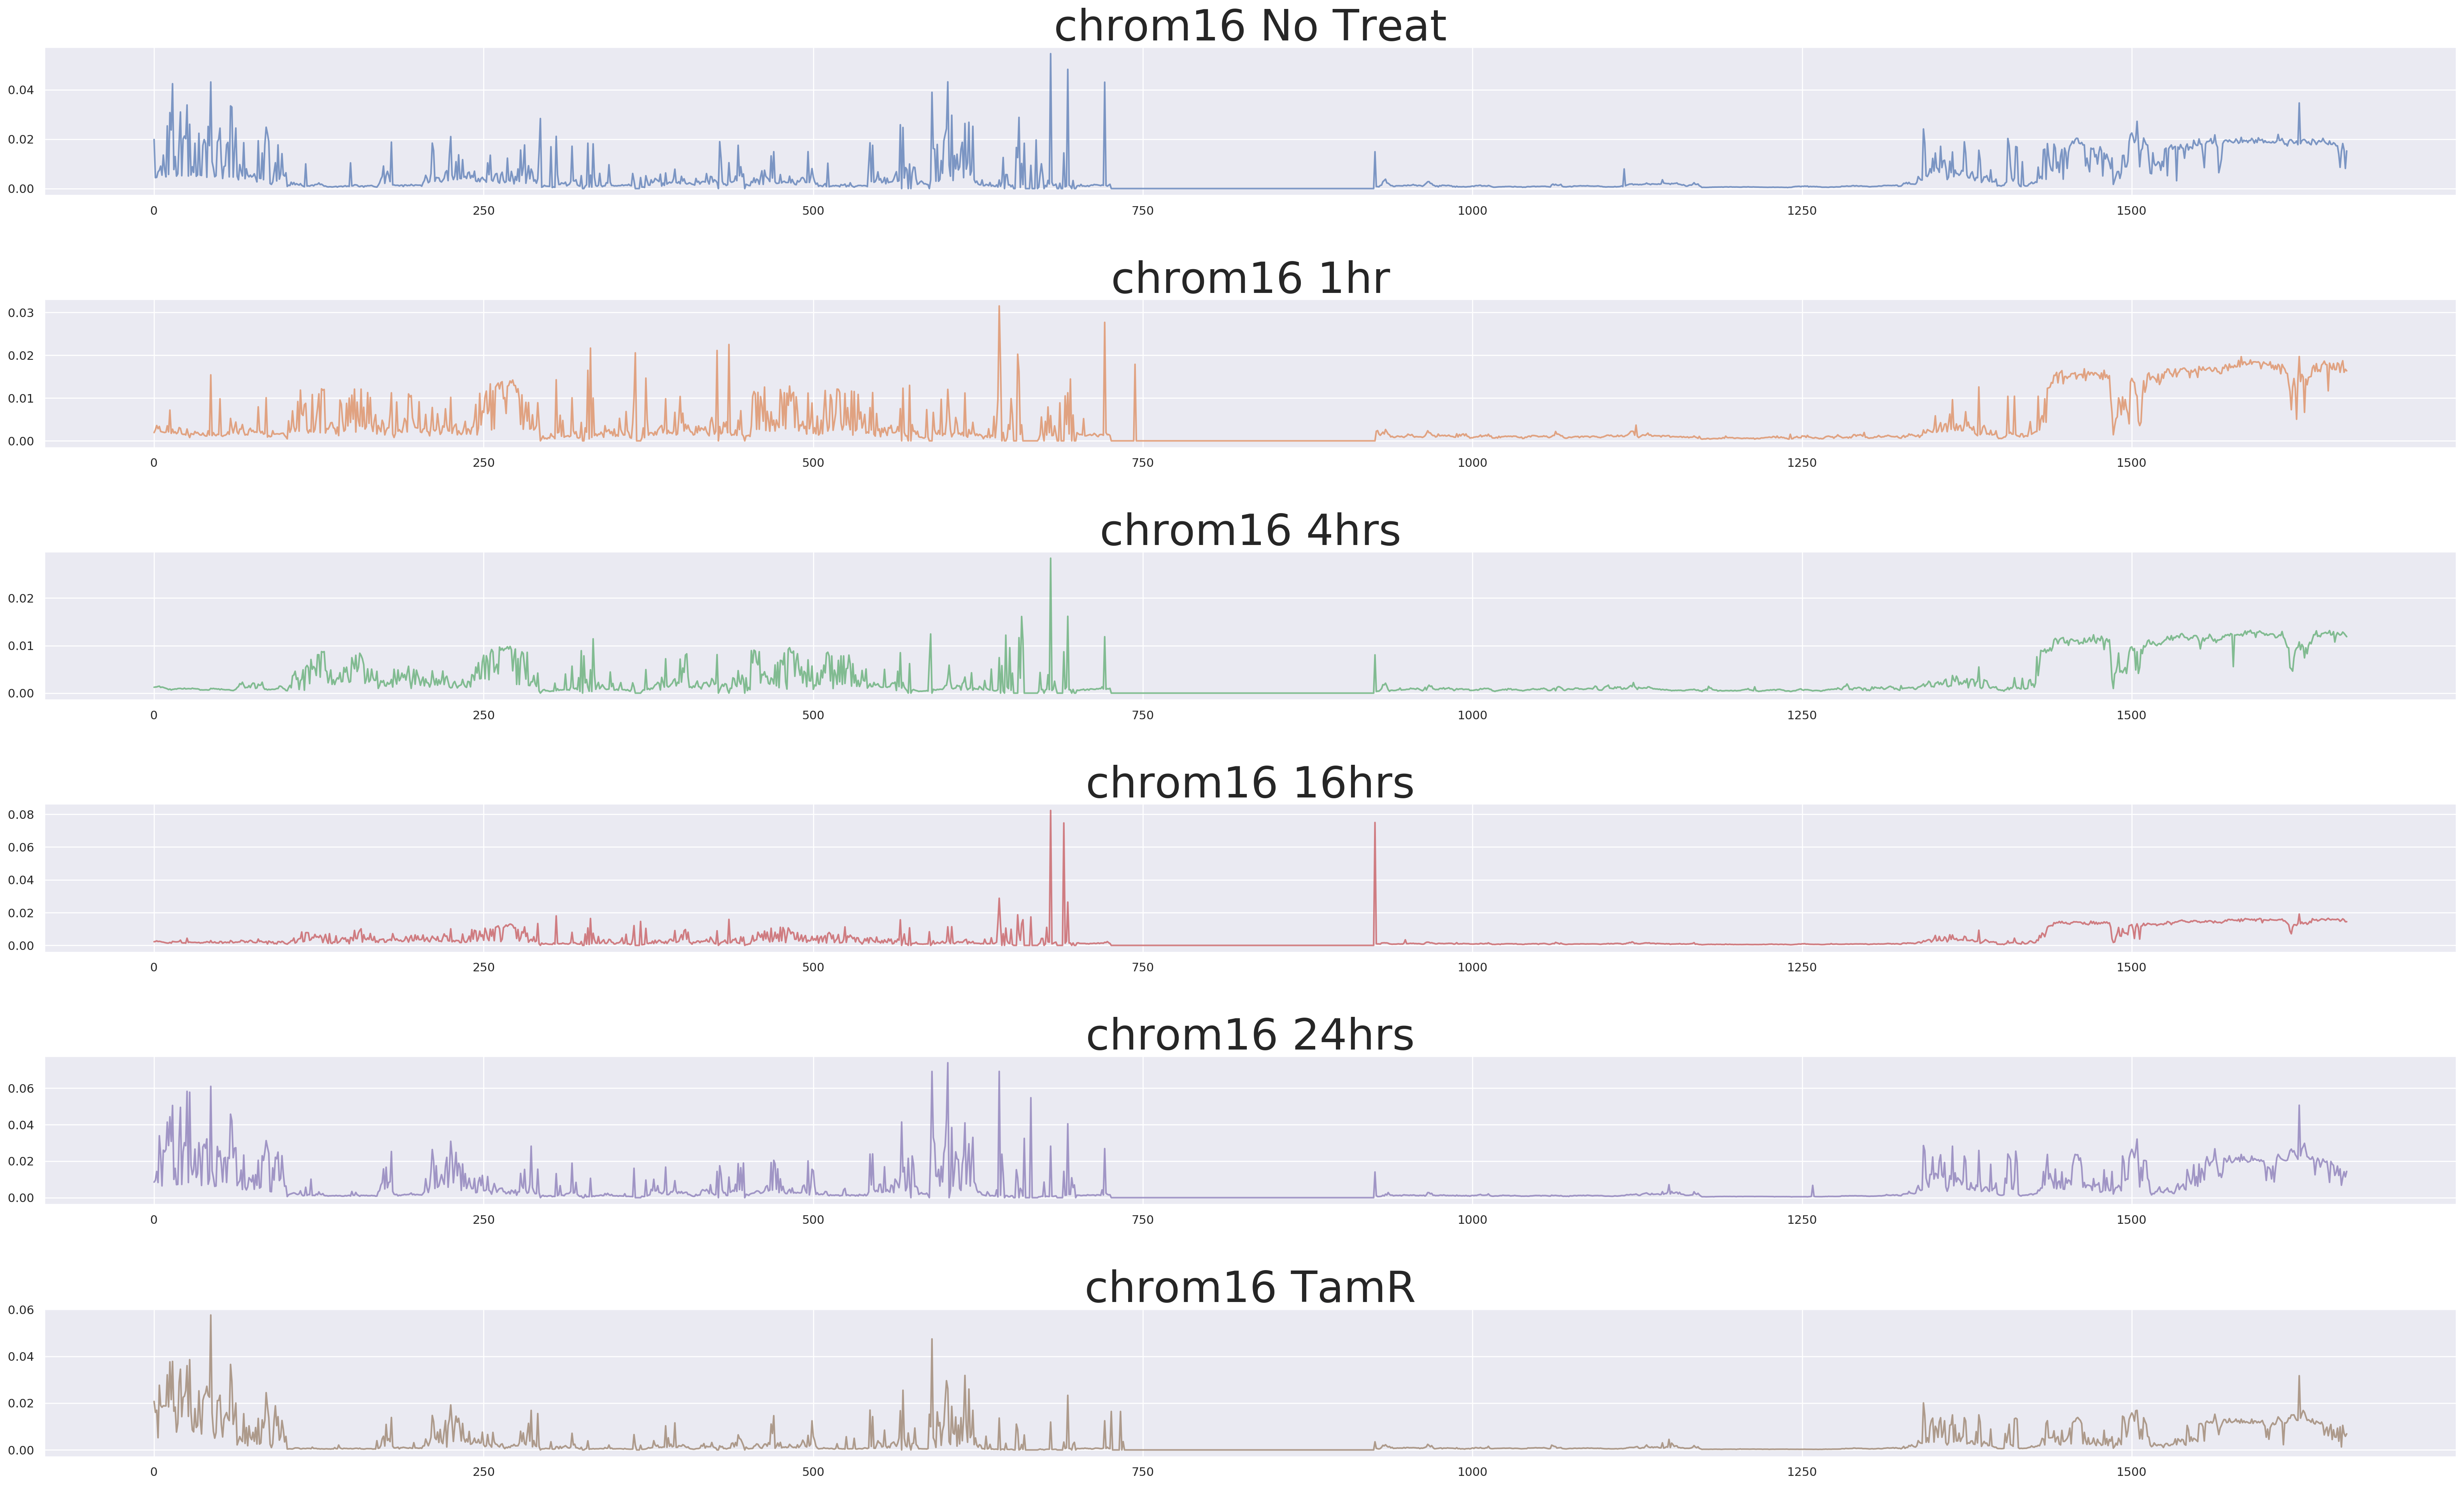

In [10]:
chrom = '16'
sqfs_list = []

# calc
for sp in ['02','03','04','05','06','51']:

    gnm = loadModel(f'../data/GNM/mcf7_{sp}.chr{chrom}.{resol}.sqrtvc.gnm.npz')
    gnm.masked = False 
    gnm.fixTail(1664)
        
    sqfs = calcSqFlucts(gnm[:500])
    sqfs_list.append(sqfs)

# plot
fig, axes = plt.subplots(figsize=(40, len(sqfs_list)*4), ncols=1, nrows=len(sqfs_list), dpi=200)
plt.subplots_adjust(wspace=0.2, hspace=0.7) # 
ax_list = axes.flatten()
colors = sns.color_palette('deep')
conditions = ['No Treat','1hr','4hrs','16hrs','24hrs', 'TamR']

for i,x in enumerate(sqfs_list):
    ax = ax_list[i]
    ax.plot(x, '-', color=colors[i], alpha=.7)
    ax.set_title(f'chrom{chrom} {conditions[i]}', fontsize=40)

# Compartments

In [11]:
import bioframe
# import cooltools
import cooler

In [12]:
conditions = ['No Treatment','1hr','4hrs','16hrs','24hrs', 'TamR']
files = ['02','03','04','05','06','51']
binsize = 50000

cooler_paths = {conditions[i]: f'../data/cool_balanced/SRR64937{files[i]}.GRCh38.mapq_30.{binsize}.cool' for i in range(len(files))}  

clrs = {
    cond: cooler.Cooler(cooler_paths[cond]) for cond in conditions
}

In [13]:
hg38 = bioframe.fetch_chromsizes('hg38')
bins = cooler.binnify(hg38, binsize)
bins = bins[bins['chrom']!='chrM']
bins['chrom'] = [x.strip('chr') for x in bins['chrom']]
bins.head()

chrom   start     end
0     1       0   50000
1     1   50000  100000
2     1  100000  150000
3     1  150000  200000
4     1  200000  250000

In [14]:
from cooltools.eigdecomp import cooler_cis_eig

lam = {}
eigs = {}

for cond in conditions:
    lam[cond], eigs[cond] = cooler_cis_eig(
        clrs[cond], 
        bins,
        n_eigs=3, 
        phasing_track_col=None, 
        sort_metric='var_explained')


In [15]:
!mkdir ../data/cool_eig
np.savez(f'../data/cool_eig/mcf7.{binsize//1000}kb.eigs.npz', eigs=eigs, lam=lam)

mkdir: cannot create directory ‘../data/cool_eig’: File exists


In [16]:
# f = np.load(f'../data/cool_eig/mcf7.{binsize//1000}kb.eigs.npz')
# f.files 

In [17]:
tmp = eigs['No Treatment']
E1 = tmp[tmp['chrom']=='16']['E1'].fillna(0).values 
print(len(E1))
E1 

1807


array([0.        , 0.85313237, 0.66523744, ..., 0.        , 0.        ,
       0.        ])

In [18]:
# import os
# os.chdir('/home/fangyuan/projects/hic/codes')

# y = '02'
# chrom = '16'
# binsize = 50000
# from hicparsers import parseBulkMap

# fpath = f'../data/contact/SRR64937{y}.txt'
# M, bin = parseBulkMap(fpath, chroms=chrom, bin=binsize)

# hic = HiC('population', M, bin) # prody.chromatin.hic
# hic.normalize(method=VCnorm)

# hic.masked = True

# gnm = hic.calcGNM(zeros=True)  
# gnm.masked = False
# gnm.fixTail(M.shape[0])

# # gnm = loadModel(f'../data/GNM/mcf7_{y}.chr{chrom}.{binsize//1000}kb.sqrtvc.gnm.npz')

In [30]:
y = '02'
chrom = '16'

gnm = loadModel(f'../data/GNM/mcf7_{y}.chr{chrom}.{binsize//1000}kb.sqrtvc.gnm.npz')

In [31]:
E2 = gnm.getEigvecs()

In [49]:
# gnm.masked = False
domains = calcGNMDomains(gnm[:100], dummy_mode=False, linear=True)

In [50]:
len(np.unique(domains))

167

In [42]:
(np.diff(np.sign(E1))!=0).sum()

186

In [55]:
from sklearn import metrics
metrics.mutual_info_score() # two clustering 

TypeError: mutual_info_score() missing 2 required positional arguments: 'labels_true' and 'labels_pred'

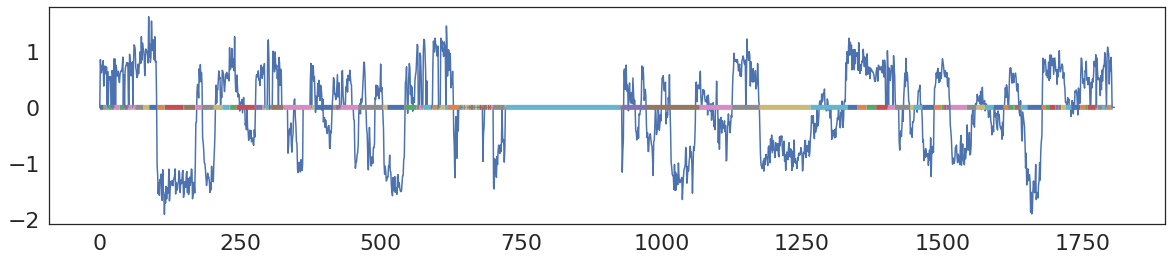

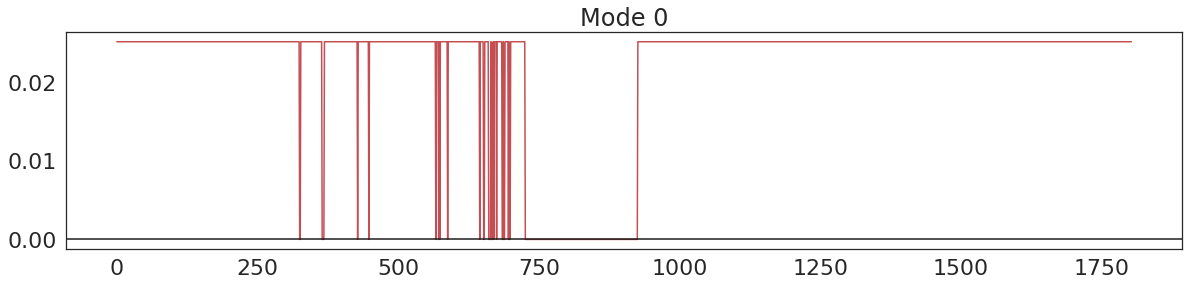

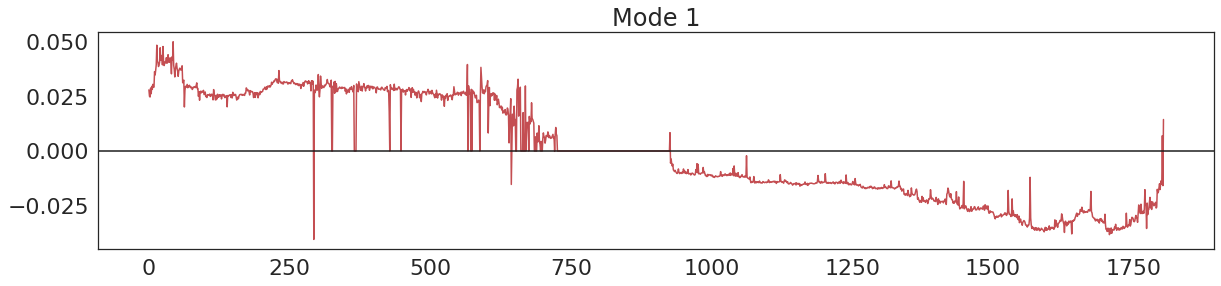

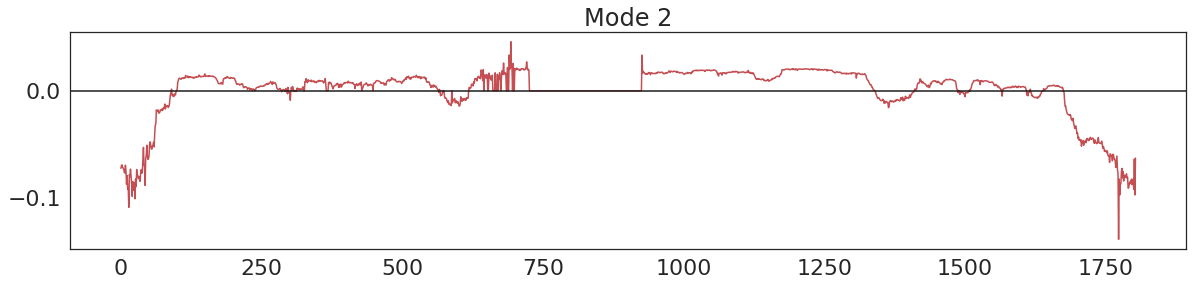

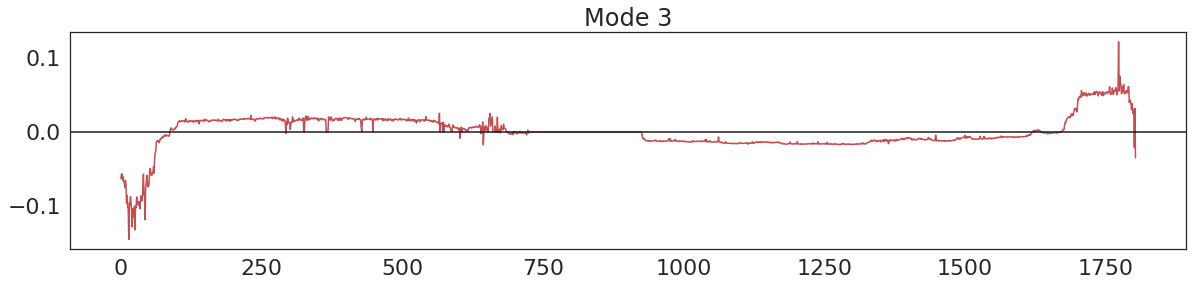

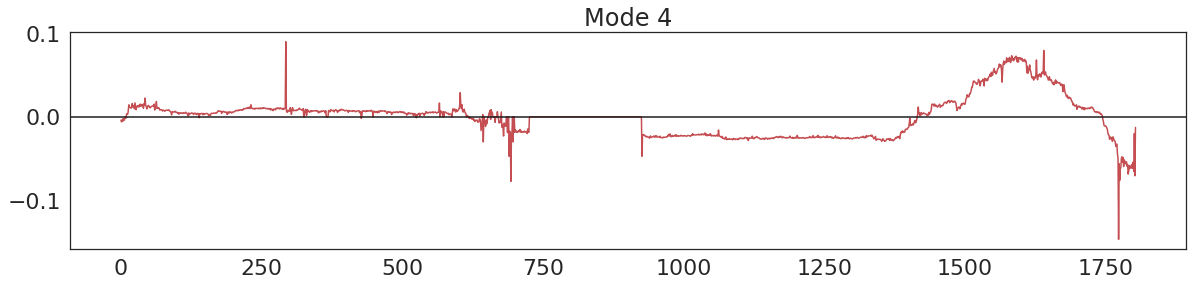

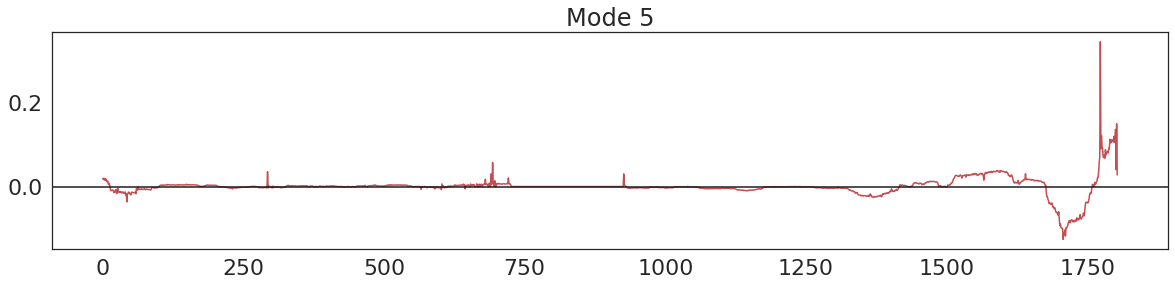

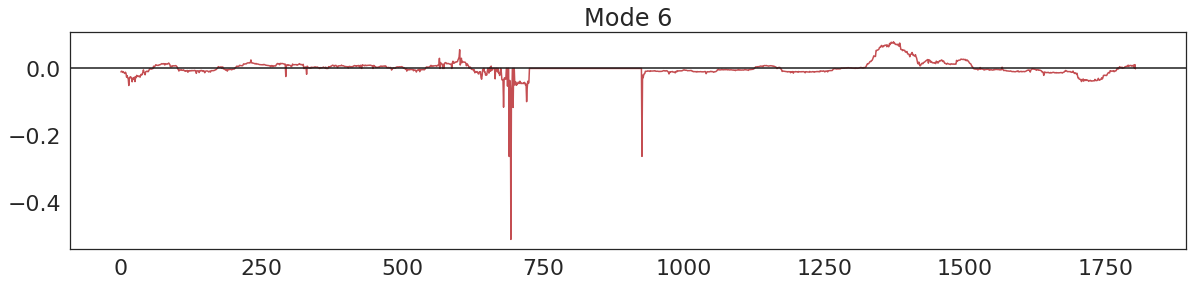

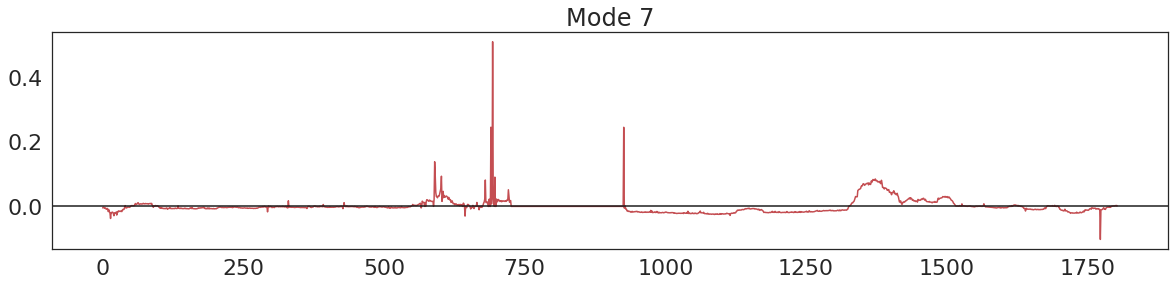

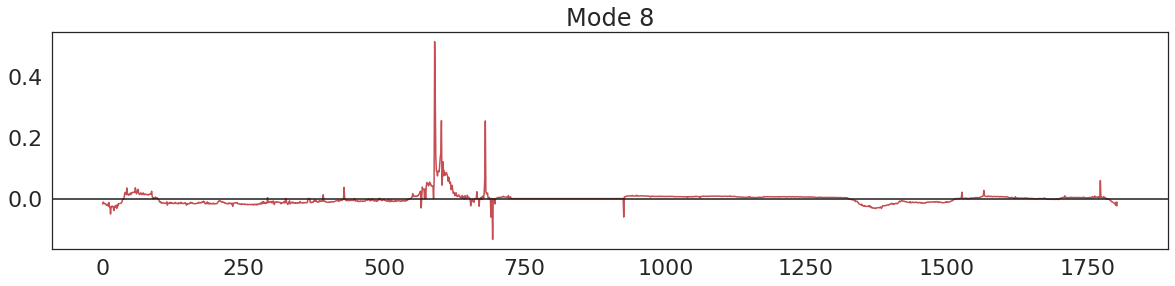

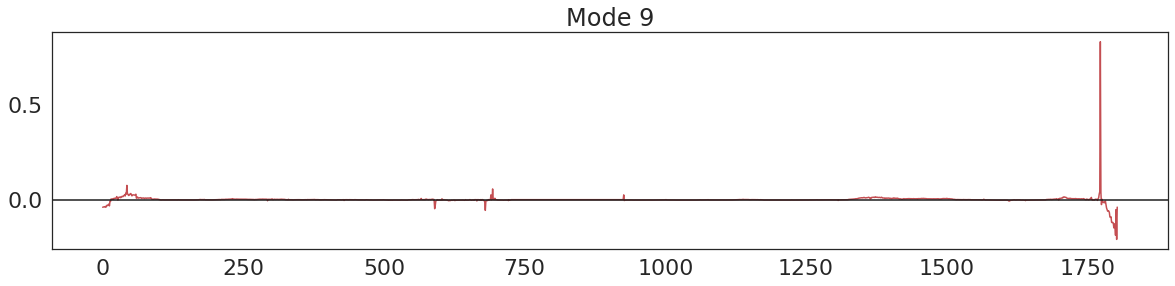

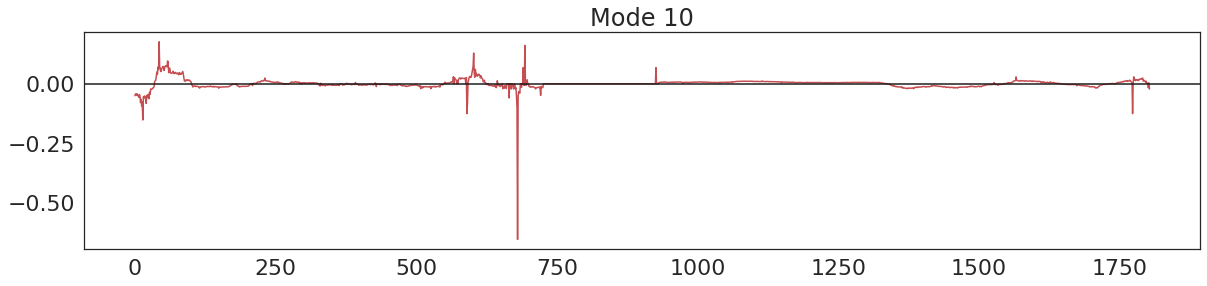

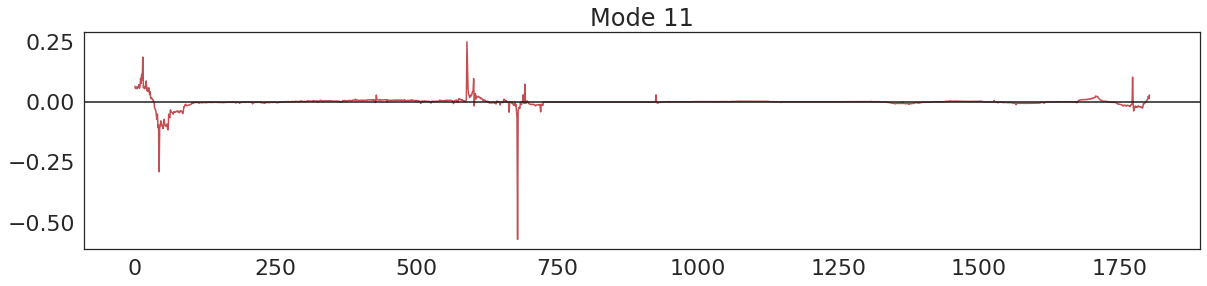

In [51]:
plt.figure(figsize=(20,4))
plt.plot(E1, 'b-')

showDomainBar(domains, loc=0., absolute=True, text=False)

for i in range(0,12):
    plt.figure(figsize=(20,4))
    plt.plot(E2[:, i], 'r-')
    plt.axhline(y=0, c='k')
    plt.title(f'Mode {i}')

In [9]:
i = 0
x1 = np.sum(corr_list[i], axis=0)

plt.figure(figsize=(20,3))
plt.plot(E1[:len(x1)], 'b-')
plt.axhline(y=0,c='k')

# plt.figure(figsize=(12,2))
plt.plot(x1/30, 'r-')
plt.axhline(y=0,c='k')

NameError: name 'E1' is not defined

<Figure size 1440x216 with 0 Axes>

NameError: name 'eigs' is not defined

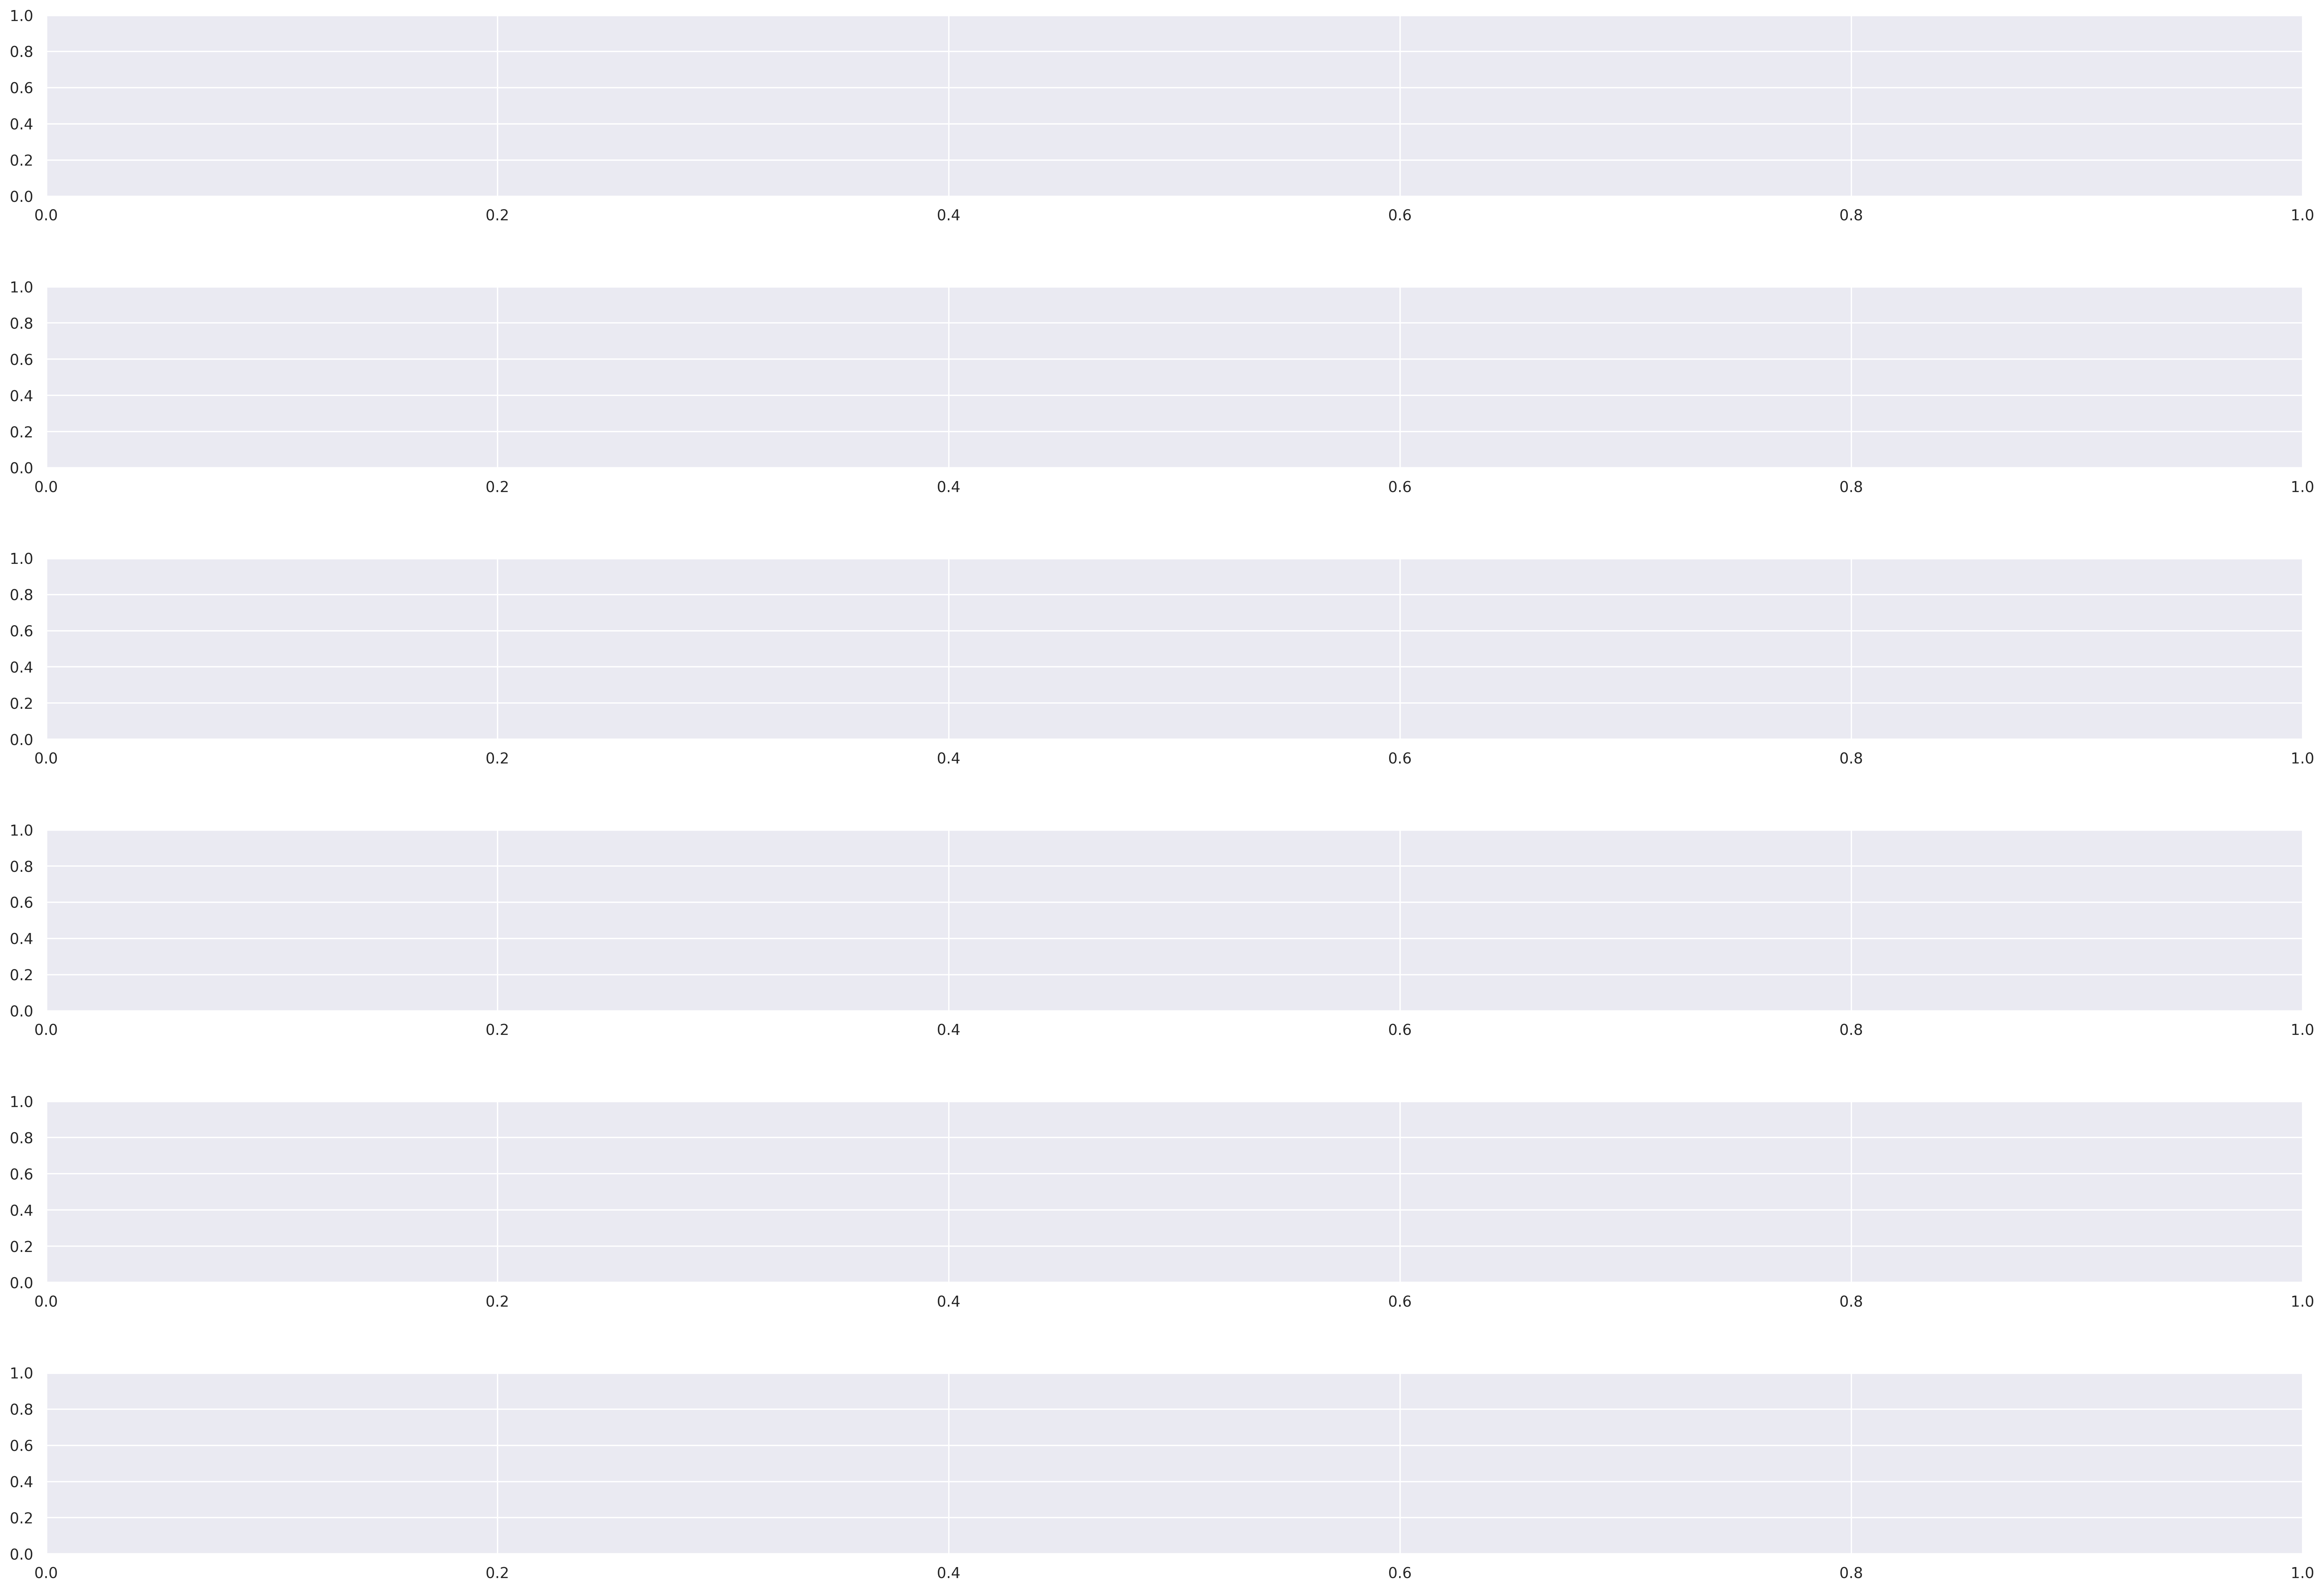

In [10]:
nplots = len(conditions)
ncols = 1
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*30, nrows*3.5), dpi=300)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for i, cond in enumerate(conditions):
    ax = axes_list[i]
    
    tmp = eigs[cond]
    E1 = tmp[tmp['chrom']=='16']['E1'].fillna(0).values 
    ax.plot(E1[:len(x1)], 'b-')
    ax.axhline(y=0,c='k')

    x1 = np.sum(corr_list[i], axis=0)
    ax.plot(x1/30, 'r-')
    ax.axhline(y=0,c='k')
    
    ax.set_title(cond, fontsize=40)

In [ ]:
i = 0
x1 = np.sum(corr_list[i], axis=0)

plt.figure(figsize=(20,3), dpi=300)
plt.plot(E1[:len(x1)], 'b-')
plt.axhline(y=0,c='k')

plt.figure(figsize=(20,3), dpi=300)
plt.plot(x1/30, 'r-')
plt.axhline(y=0,c='k')

plt.figure(figsize=(20,3), dpi=300)
plt.plot(sqfs[i][:len(x1)]*100, 'g-')
plt.axhline(y=0,c='k')

In [ ]:
for i in range(5):
    print(sqfs[i].shape, corr_list[i].shape)

In [ ]:
nplots = len(conditions)
ncols = 1
nrows = ceil(nplots/ncols)

fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(ncols*30, nrows*3.5), dpi=300)
plt.subplots_adjust(wspace=0.2, hspace=0.5) # 
axes_list = axes.flatten()

for i, cond in enumerate(conditions):
    ax = axes_list[i]
    
    tmp = eigs[cond]
    E1 = tmp[tmp['chrom']=='16']['E1'].fillna(0).values 
    ax.plot(E1[:len(x1)], 'b-')
    ax.axhline(y=0,c='k')

    x1 = np.sum(corr_list[i], axis=0)
    ax.plot(x1/20, 'r-')
#     ax.axhline(y=0,c='k')
    
    ax.plot(sqfs[i][:len(x1)]*100, 'g-')
    
    ax.set_title(cond, fontsize=40)

# Sketch

In [ ]:
gnm.getEigvecs()

In [ ]:
gnm.getEigvals()[:20]

In [ ]:
plt.bar(np.arange(1,10), calcCollectivity(gnm[1:10]))

In [ ]:
cc = calcCrossCorr(gnm[:3])
showMatrix(cc)

In [ ]:
showMode(gnm[1])

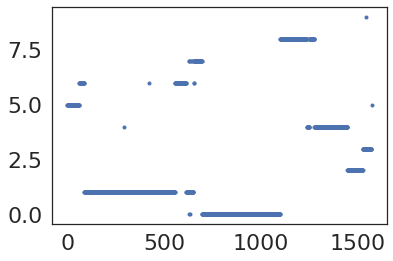

In [59]:
gnm.masked = True
domains = calcGNMDomains(gnm[:10], dummy_mode=False, linear=False)
plt.plot(domains, '.')

In [ ]:
# gnm mask: fill in missing loci (K is not full-ranked(with zero eigen values))
for i,sp in enumerate(['02','03','04','05','06','51']):
    for chrom in chroms:

        ## load GNM results 
        gnm = loadModel(f'../data/GNM/mcf7_{sp}.chr{chrom}.{resol}.sqrtvc.gnm.npz')
        gnm.masked = False 
        gnm.fixTail(1664)
        
        print(gnm.numAtoms())

In [ ]:
sqfs_list

In [ ]:
np.array(sqfs_list)

In [ ]:
from scipy.stats import pdist, squareform
    M = np


In [ ]:
chroms = [str(i) for i in range(1,23)] + ['X', 'Y']

fig, axes = plt.subplots(figsize=(40, len(chroms)*10), ncols=1, nrows=len(chroms), dpi=200)
ax_list = axes.flatten()
colors = sns.color_palette('deep')
conditions = ['No Treat','1hr','4hrs','16hrs','24hrs', 'TamR']

for n,chrom in enumerate(chroms):
    
    ax = ax_list[n]
    sqfs_list = []
    
    for sp in ['02','03','04','05','06','51']:

        gnm = loadModel(f'../data/GNM/mcf7_{sp}.chr{chrom}.{resol}.sqrtvc.gnm.npz')
        sqfs = calcSqFlucts(gnm[:500])
        sqfs_list.append(sqfs)
    
    for i,x in enumerate(sqfs_list):
        ax.plot(x, '-', color=colors[i], label=conditions[i])
    ax.legend(loc='center', bbox_to_anchor=(1.1, 0.5))
    ax.set_title(f'chrom{chrom}', fontsize=80)

In [ ]:
sns.color_palette('deep')

In [ ]:
sns.palplot(colors)